In [1]:
import pandas as pd
import statistics
import seaborn as sns
import numpy as np
from scipy import stats
from math import cos,sin,pi
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("heart_disease_uci.csv")
data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [3]:
missing_values = data.isnull().sum()
print("Jumlah Nilai Missing di Setiap Kolom:")
print(missing_values)
print("-----------")

Jumlah Nilai Missing di Setiap Kolom:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64
-----------


In [4]:
num = data.select_dtypes(include=[np.number]).columns
cat = data.select_dtypes(exclude=[np.number]).columns
data[num] = data[num].fillna(data[num].mean())
data[cat] = data[cat].apply(lambda col: col.fillna(col.mode().iloc[0]))
data = data.infer_objects(copy=False)
fixvalues = data.isnull().sum()
print(fixvalues)
print("----------------------")
print("   ")
data = data.infer_objects()
data.info()
print(data.describe())

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64
----------------------
   
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    bool   
 8   restecg   920 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     920 non-null    bool   
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    object 
 13  ca        920 non-null    float64
 14  th

C:\Users\USER\AppData\Local\Temp\ipykernel_3068\2704975812.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[cat] = data[cat].apply(lambda col: col.fillna(col.mode().iloc[0]))


In [5]:
pd.set_option('mode.chained_assignment', None)
ok = {'Male': 0, 'Female': 1}
data['sex'] = data['sex'].replace(ok)

data['fbs'] = data['fbs'].astype(bool)
data['exang'] = data['exang'].astype(bool) 
data['fbs'] = data['fbs'].astype(int)
data['exang'] = data['exang'].astype(int) 
data['sex'] = data['sex'].astype(int)
print(data.head())

   id  age  sex    dataset               cp  trestbps   chol  fbs  \
0   1   63    0  Cleveland   typical angina     145.0  233.0    1   
1   2   67    0  Cleveland     asymptomatic     160.0  286.0    0   
2   3   67    0  Cleveland     asymptomatic     120.0  229.0    0   
3   4   37    0  Cleveland      non-anginal     130.0  250.0    0   
4   5   41    1  Cleveland  atypical angina     130.0  204.0    0   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0      0      2.3  downsloping  0.0   
1  lv hypertrophy   108.0      1      1.5         flat  3.0   
2  lv hypertrophy   129.0      1      2.6         flat  2.0   
3          normal   187.0      0      3.5  downsloping  0.0   
4  lv hypertrophy   172.0      0      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  


C:\Users\USER\AppData\Local\Temp\ipykernel_3068\1276963392.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sex'] = data['sex'].replace(ok)


In [6]:
scaler = StandardScaler()
num_cols = ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
data[num_cols] = scaler.fit_transform(data[num_cols])
data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,0,Cleveland,typical angina,0.698041,0.311021,1,lv hypertrophy,0.495698,0,1.349421,downsloping,-1.249371e+00,fixed defect,0
1,2,67,0,Cleveland,asymptomatic,1.511761,0.797713,0,lv hypertrophy,-1.175955,1,0.589832,flat,4.292099e+00,normal,2
2,3,67,0,Cleveland,asymptomatic,-0.658158,0.274289,0,lv hypertrophy,-0.340128,1,1.634267,flat,2.444942e+00,reversable defect,1
3,4,37,0,Cleveland,non-anginal,-0.115679,0.467130,0,normal,1.968345,0,2.488805,downsloping,-1.249371e+00,normal,0
4,5,41,1,Cleveland,atypical angina,-0.115679,0.044717,0,lv hypertrophy,1.371326,0,0.494884,upsloping,-1.249371e+00,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,1,VA Long Beach,asymptomatic,-0.278423,1.229308,1,st-t abnormality,0.654903,0,-0.834397,flat,-2.050756e-16,normal,1
916,917,62,0,VA Long Beach,typical angina,0.000000,-0.552169,0,st-t abnormality,0.000000,0,0.000000,flat,-2.050756e-16,normal,0
917,918,55,0,VA Long Beach,asymptomatic,-0.549662,0.219192,1,st-t abnormality,-1.494365,0,-0.834397,flat,-2.050756e-16,fixed defect,2
918,919,58,0,VA Long Beach,asymptomatic,0.000000,1.706817,1,lv hypertrophy,0.000000,0,0.000000,flat,-2.050756e-16,normal,0


In [7]:
print("TotalOutliers")

def detect_outliers_iqr(df):
    numeric_data = df.select_dtypes(include=['number'])
    outliers_summary = {}

    for column in numeric_data.columns:
        Q1 = numeric_data[column].quantile(0.25)
        Q3 = numeric_data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = numeric_data[(numeric_data[column] < lower_bound) | (numeric_data[column] > upper_bound)]
        outliers_count = len(outliers)
        
        outliers_summary[column] = outliers_count
        print(f"{column} = {outliers_count}")

detect_outliers_iqr(data)

TotalOutliers
id = 0
age = 0
sex = 194
trestbps = 28
chol = 185
fbs = 138
thalch = 2
exang = 0
oldpeak = 16
ca = 309
num = 0


In [20]:
print("Outlier Setelah Dibersihkan")
def detect_and_fix_outliers_iqr(df):
    numeric_data = df.select_dtypes(include=['number'])
    outliers_summary = {}

    for column in numeric_data.columns:
        Q1 = numeric_data[column].quantile(0.25)
        Q3 = numeric_data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = numeric_data[(numeric_data[column] < lower_bound) | (numeric_data[column] > upper_bound)]
        outliers_count = len(outliers)
        
        df[column] = df[column].clip(lower_bound, upper_bound)
        
        outliers_summary[column] = {
            'initial_count': outliers_count,
            'final_count': len(df[(df[column] < lower_bound) | (df[column] > upper_bound)])
        }
        
        print(f"{column}  {outliers_summary[column]['final_count']}")

    return df, outliers_summary

data, outliers_summary = detect_and_fix_outliers_iqr(data)
print("Outliers summary:", outliers_summary)


Outlier Setelah Dibersihkan
id  0
age  0
sex  0
trestbps  0
chol  0
fbs  0
thalch  0
exang  0
oldpeak  0
ca  0
num  0
Outliers summary: {'id': {'initial_count': 0, 'final_count': 0}, 'age': {'initial_count': 0, 'final_count': 0}, 'sex': {'initial_count': 0, 'final_count': 0}, 'trestbps': {'initial_count': 0, 'final_count': 0}, 'chol': {'initial_count': 0, 'final_count': 0}, 'fbs': {'initial_count': 0, 'final_count': 0}, 'thalch': {'initial_count': 0, 'final_count': 0}, 'exang': {'initial_count': 0, 'final_count': 0}, 'oldpeak': {'initial_count': 0, 'final_count': 0}, 'ca': {'initial_count': 0, 'final_count': 0}, 'num': {'initial_count': 0, 'final_count': 0}}


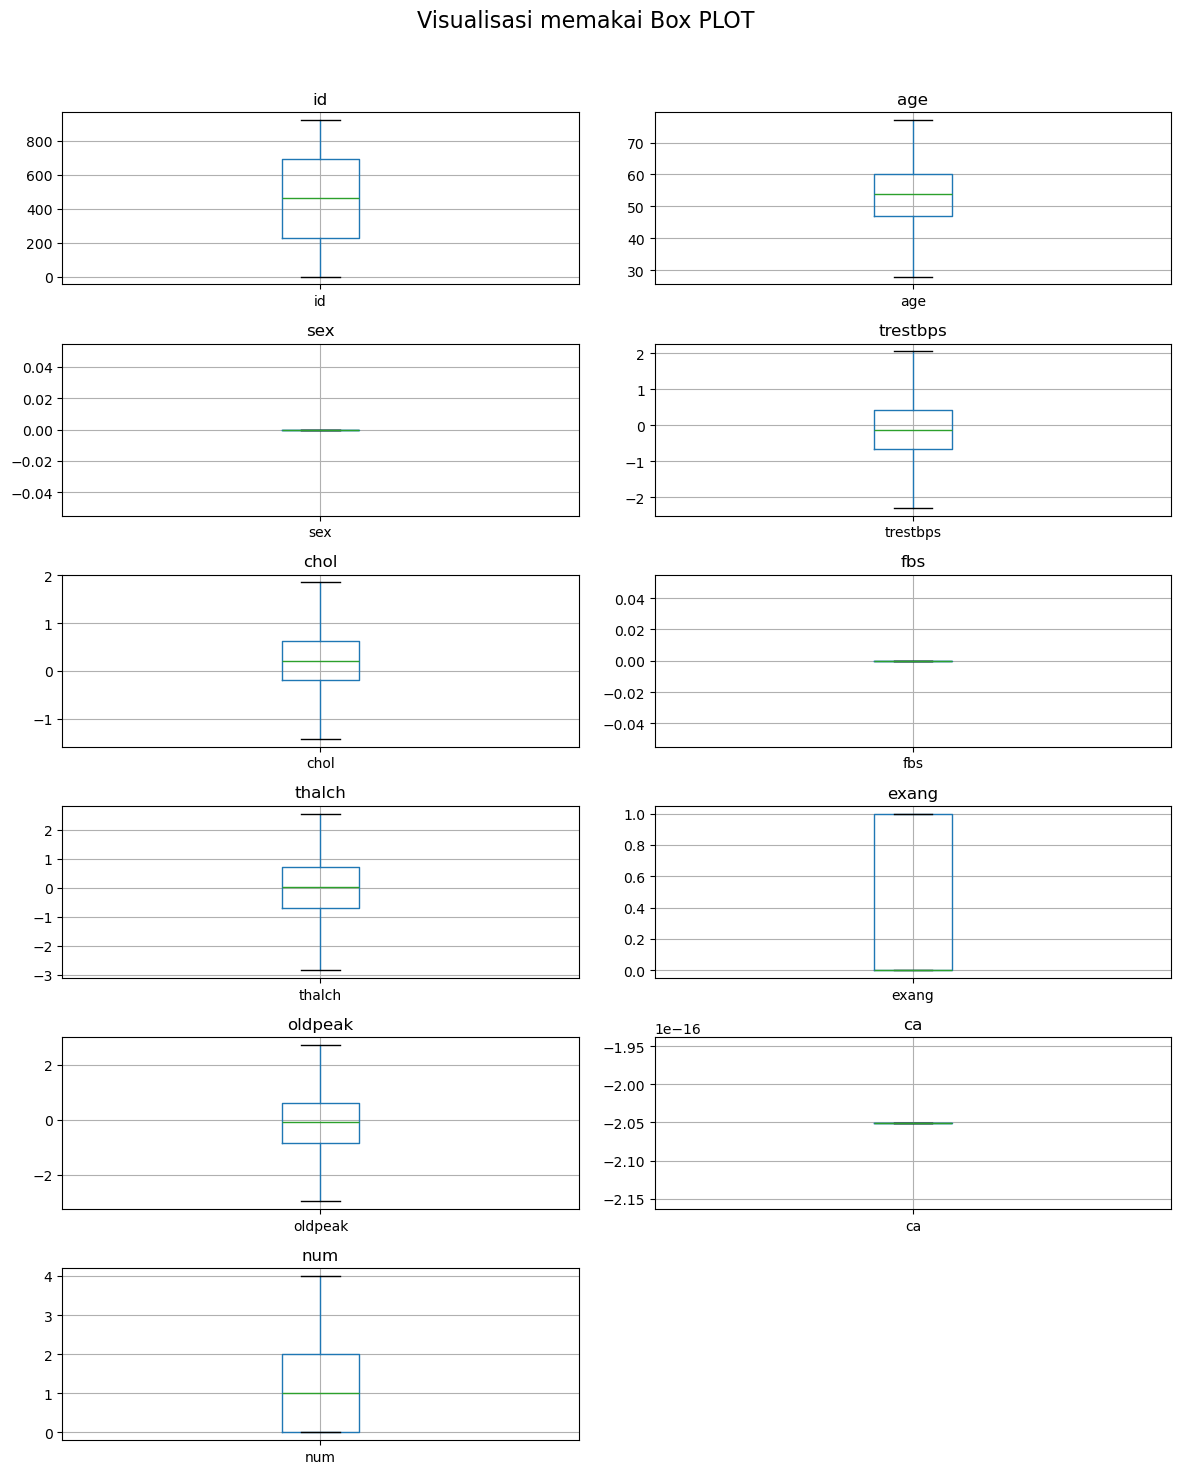

In [32]:
num_cols = len(data.select_dtypes(include=['number']).columns)
fig, axes = plt.subplots(nrows=(num_cols + 1) // 2, ncols=2, figsize=(12, 15))
axes = axes.flatten()
for i, column in enumerate(data.select_dtypes(include=['number']).columns):
    data.boxplot(column=column, ax=axes[i])
    axes[i].set_title(column)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.suptitle("Visualisasi memakai Box PLOT", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
